# Evaluating Retriever:
1. Build TF-IDF and BM25 matrix based on training set
2. Test on test set
3. Evaluate: Recall@k, Precision@k

In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.2 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

ds = load_dataset("allenai/qasper")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.64k [00:00<?, ?B/s]

qasper.py:   0%|          | 0.00/5.95k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.4M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.75M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/7.07M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/888 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/281 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/416 [00:00<?, ? examples/s]

In [4]:
import pandas as pd

def create_qa_dataframe(ds, se):
    # Lists to store the data
    titles = []
    questions = []
    answers = []
    list_of_full_papers = []
    relevant_paragraphs = []

    # Iterate through the dataset
    for id in range(len(ds[se])):
        paragraphs = []
        title = ds[se]['title'][id]
        for section in ds[se][id]['full_text']['paragraphs']:
            for paragraph in section:
                paragraphs.append(paragraph)
        # Iterate through questions for each document
        for i in range(len(ds[se][id]['qas']['question'])):
            # Iterate through answers for each question
            for j in range(len(ds[se][id]['qas']['answers'][i]['answer'])):
                # Check if there are extractive spans
                if len(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans']) > 0:
                    titles.append(title)
                    questions.append(ds[se][id]['qas']['question'][i])
                    answers.append(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans'])
                    list_of_full_papers.append(paragraphs)



    # Create DataFrame
    df = pd.DataFrame({
        'title': titles,
        'question': questions,
        'answer': answers,
        'full_paper': list_of_full_papers,

    })

    return df

# Usage example:
se = 'train'
df = create_qa_dataframe(ds, se)

In [5]:
df

,title,question,answer,full_paper
0,Minimally Supervised Learning of Affective Eve...,What is the seed lexicon?,[seed lexicon consists of positive and negativ...,[Affective events BIBREF0 are events that typi...
1,Minimally Supervised Learning of Affective Eve...,What are labels available in dataset for super...,"[negative, positive]",[Affective events BIBREF0 are events that typi...
2,Minimally Supervised Learning of Affective Eve...,How large is raw corpus used for training?,[100 million sentences],[Affective events BIBREF0 are events that typi...
3,"PO-EMO: Conceptualization, Annotation, and Mod...",How is the annotation experiment evaluated?,[confusion matrices of labels between annotators],"[1.1em, 1.1.1em, 1.1.1.1em, Thomas Haider$^{1,..."
4,"PO-EMO: Conceptualization, Annotation, and Mod...",What are the aesthetic emotions formalized?,[feelings of suspense experienced in narrative...,"[1.1em, 1.1.1em, 1.1.1.1em, Thomas Haider$^{1,..."
...,...,...,...,...
1358,Back to the Future -- Sequential Alignment of ...,What are three challenging tasks authors evalu...,"[paper acceptance prediction, Named Entity Rec...","[As time passes, language usage changes. For e..."
1359,Analyzing Language Learned by an Active Questi...,What is the difference in findings of Buck et ...,[AQA diverges from well structured language in...,[ BIBREF0 propose a reinforcement learning fra...
1360,Deep Semi-Supervised Learning with Linguistica...,What is the unsupervised task in the final layer?,[Language Modeling],[It is natural to think of NLP tasks existing ...
1361,Deep Semi-Supervised Learning with Linguistica...,How many supervised tasks are used?,[two],[It is natural to think of NLP tasks existing ...


In [3]:
import pandas as pd

def create_qa_dataframe(ds, se):
    # Lists to store the data
    titles = []
    questions = []
    answers = []
    list_of_full_papers = []
    relevant_paragraphs = []

    # Iterate through the dataset
    for id in range(len(ds[se])):
        paragraphs = []
        title = ds[se]['title'][id]
        for section in ds[se][id]['full_text']['paragraphs']:
            for paragraph in section:
                paragraphs.append(paragraph)

        # Iterate through questions for each document
        for i in range(len(ds[se][id]['qas']['question'])):
            # Iterate through answers for each question
            for j in range(len(ds[se][id]['qas']['answers'][i]['answer'])):
                # Check if there are extractive spans
                if len(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans']) > 0:
                    answer_span = ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans'][0]

                    # Find the paragraph containing the answer
                    #relevant_para = None
                    #for para in paragraphs:
                        #if answer_span in para:
                            #relevant_para = para
                            #break

                    titles.append(title)
                    questions.append(ds[se][id]['qas']['question'][i])
                    answers.append(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans'])
                    list_of_full_papers.append(paragraphs)
                    relevant_paragraphs.append(ds[se][id]['qas']['answers'][i]['answer'][j]['evidence'])

    # Create DataFrame
    df = pd.DataFrame({
        'title': titles,
        'question': questions,
        'answer': answers,
        'full_paper': list_of_full_papers,
        'relevant_paragraphs': relevant_paragraphs
    })

    return df

# Usage example:
se = 'train'
df = create_qa_dataframe(ds, se)

In [7]:
df

,title,question,answer,full_paper,relevant_paragraphs
0,Minimally Supervised Learning of Affective Eve...,What is the seed lexicon?,[seed lexicon consists of positive and negativ...,[Affective events BIBREF0 are events that typi...,[The seed lexicon consists of positive and neg...
1,Minimally Supervised Learning of Affective Eve...,What are labels available in dataset for super...,"[negative, positive]",[Affective events BIBREF0 are events that typi...,[Affective events BIBREF0 are events that typi...
2,Minimally Supervised Learning of Affective Eve...,How large is raw corpus used for training?,[100 million sentences],[Affective events BIBREF0 are events that typi...,"[As a raw corpus, we used a Japanese web corpu..."
3,"PO-EMO: Conceptualization, Annotation, and Mod...",How is the annotation experiment evaluated?,[confusion matrices of labels between annotators],"[1.1em, 1.1.1em, 1.1.1.1em, Thomas Haider$^{1,...",[We find that Cohen $\kappa $ agreement ranges...
4,"PO-EMO: Conceptualization, Annotation, and Mod...",What are the aesthetic emotions formalized?,[feelings of suspense experienced in narrative...,"[1.1em, 1.1.1em, 1.1.1.1em, Thomas Haider$^{1,...",[To emotionally move readers is considered a p...
...,...,...,...,...,...
1358,Back to the Future -- Sequential Alignment of ...,What are three challenging tasks authors evalu...,"[paper acceptance prediction, Named Entity Rec...","[As time passes, language usage changes. For e...",[We consider three tasks representing a broad ...
1359,Analyzing Language Learned by an Active Questi...,What is the difference in findings of Buck et ...,[AQA diverges from well structured language in...,[ BIBREF0 propose a reinforcement learning fra...,[Here we perform a qualitative analysis of thi...
1360,Deep Semi-Supervised Learning with Linguistica...,What is the unsupervised task in the final layer?,[Language Modeling],[It is natural to think of NLP tasks existing ...,[In our model we represent linguistically moti...
1361,Deep Semi-Supervised Learning with Linguistica...,How many supervised tasks are used?,[two],[It is natural to think of NLP tasks existing ...,[FLOAT SELECTED: Figure 1: Our Hierarchical Ne...


In [ ]:
!pip install rank_bm25

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# Load your training data
# Assuming the training data is in a CSV file with a 'full_paper' column
# Replace 'train_data.csv' with your actual file path if needed
train_data = df

# Prepare the corpus of paragraphs for TF-IDF
# Flatten each 'full_paper' entry into individual paragraphs by splitting on double newlines
corpus = []
for paper in train_data['full_paper']:
    for paragraph in paper:
      if paragraph == '':
        continue
      else:
        corpus.append(paragraph)
    #paragraphs = paper.split('\n\n')  # Splitting each paper into paragraphs
    #corpus.extend(paragraphs)  # Add each paragraph to the corpus list

# Initialize and fit the TF-IDF vectorizer on the entire training corpus
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Save the vectorizer and matrix for later evaluation
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(tfidf_matrix, f)

print("TF-IDF model has been created and saved. You can now use it for retrieval on the test set.")

TF-IDF model has been created and saved. You can now use it for retrieval on the test set.


In [4]:
import pandas as pd

def create_qa_dataframe(ds, se):
    # Lists to store the data
    titles = []
    questions = []
    answers = []
    list_of_full_papers = []
    relevant_paragraphs = []

    # Iterate through the dataset
    for id in range(len(ds[se])):
        paragraphs = []
        title = ds[se]['title'][id]
        for section in ds[se][id]['full_text']['paragraphs']:
            for paragraph in section:
                paragraphs.append(paragraph)

        # Iterate through questions for each document
        for i in range(len(ds[se][id]['qas']['question'])):
            # Iterate through answers for each question
            for j in range(len(ds[se][id]['qas']['answers'][i]['answer'])):
                # Check if there are extractive spans
                if len(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans']) > 0:
                    answer_span = ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans'][0]

                    # Find the paragraph containing the answer
                    #relevant_para = None
                    #for para in paragraphs:
                        #if answer_span in para:
                            #relevant_para = para
                            #break

                    titles.append(title)
                    questions.append(ds[se][id]['qas']['question'][i])
                    answers.append(ds[se][id]['qas']['answers'][i]['answer'][j]['extractive_spans'])
                    list_of_full_papers.append(paragraphs)
                    relevant_paragraphs.append(ds[se][id]['qas']['answers'][i]['answer'][j]['evidence'])

    # Create DataFrame
    df = pd.DataFrame({
        'title': titles,
        'question': questions,
        'answer': answers,
        'full_paper': list_of_full_papers,
        'relevant_paragraphs': relevant_paragraphs
    })

    return df

# Usage example:
se = 'test'
df_test = create_qa_dataframe(ds, se)

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a function to retrieve the most relevant paragraphs from a new paper
def retrieve_from_paper(question, paper_text, tfidf_vectorizer):
    # Split the paper into paragraphs
    paragraphs = []
    for paragraph in paper_text:
      if paragraph == '':
        continue
      else:
        paragraphs.append(paragraph)
    #paragraphs = paper_text.split('\n\n')  # assuming paragraphs are separated by double newlines

    # Transform each paragraph using the fitted TF-IDF vectorizer
    paragraph_tfidf = tfidf_vectorizer.transform(paragraphs)

    # Transform the question
    question_vec = tfidf_vectorizer.transform([question])

    # Calculate cosine similarity between question and each paragraph
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()

    # Rank paragraphs by similarity
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices]

    return ranked_paragraphs

# Load your test data (assuming the test data is a CSV file with the same format as the training set)
# Replace 'test_data.csv' with the path to your actual test dataset
test_data = df_test

# Initialize counters for evaluation metrics
total_questions = len(test_data)
correct_retrievals = 0

# Iterate over each row in the test set
for index, row in test_data.iterrows():
    question = row['question']
    full_paper = row['full_paper']
    relevant_paragraphs = row['relevant_paragraphs']  # Expected relevant paragraphs

    # Retrieve the most relevant paragraphs
    ranked_paragraphs = retrieve_from_paper(question, full_paper, tfidf_vectorizer)

    # Check if the top-ranked paragraph is in the relevant paragraphs
    top_paragraph = ranked_paragraphs[0][0]  # Get the text of the top-ranked paragraph
    if top_paragraph in relevant_paragraphs:
        correct_retrievals += 1

# Calculate accuracy
accuracy = correct_retrievals / total_questions
print(f"Retrieval Accuracy: {accuracy:.2f}")


Retrieval Accuracy: 0.19


In [ ]:
df_test.tail(10)

,title,question,answer,full_paper,relevant_paragraphs
1807,Automatic Extraction of Personality from Text:...,What language model is trained?,[ULMFiT],[Since the introduction of the personality con...,[As our language model we used ULMFiT BIBREF21...
1808,Automatic Extraction of Personality from Text:...,What language model is trained?,[ULMFiT BIBREF21],[Since the introduction of the personality con...,[As our language model we used ULMFiT BIBREF21...
1809,Automatic Extraction of Personality from Text:...,What machine learning models are considered?,"[RandomForestRegressor, LinearSVR, KNeighborsR...",[Since the introduction of the personality con...,[Several regression models were tested from th...
1810,Automatic Extraction of Personality from Text:...,What machine learning models are considered?,"[RandomForestRegressor, LinearSVR, KNeighborsR...",[Since the introduction of the personality con...,[Several regression models were tested from th...
1811,How to evaluate sentiment classifiers for Twit...,Which three variants of sequential validation ...,"[seq(9:1, 20, equi) - 9:1 training:test ratio,...",[Social media are becoming an increasingly imp...,[Throughout our experiments we use only one tr...
1812,How to evaluate sentiment classifiers for Twit...,Which three variants of sequential validation ...,"[9:1 training:test ratio, 20 equidistant sampl...",[Social media are becoming an increasingly imp...,[Social media are becoming an increasingly imp...
1813,How to evaluate sentiment classifiers for Twit...,Which three variants of cross-validation are e...,"[10-fold, stratified, blocked;, 10-fold, not s...",[Social media are becoming an increasingly imp...,"[First, we apply 10-fold cross-validation wher..."
1814,How to evaluate sentiment classifiers for Twit...,Which three variants of cross-validation are e...,"[xval(9:1, strat, block) - 10-fold, stratified...",[Social media are becoming an increasingly imp...,"[First, we apply 10-fold cross-validation wher..."
1815,How to evaluate sentiment classifiers for Twit...,In what way are sentiment classes ordered?,[time-ordered],[Social media are becoming an increasingly imp...,[The complexity of Twitter data raises some ch...
1816,How to evaluate sentiment classifiers for Twit...,In what way are sentiment classes ordered?,"[negative, neutral, positive]",[Social media are becoming an increasingly imp...,[In the paper we address the task of sentiment...


In [ ]:
df_test.iloc[1807]

,1807
title,Automatic Extraction of Personality from Text:...
question,What language model is trained?
answer,[ULMFiT]
full_paper,[Since the introduction of the personality con...
relevant_paragraphs,[As our language model we used ULMFiT BIBREF21...


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a function to retrieve the most relevant paragraph from a new paper
def retrieve_from_paper(question, paper_text, tfidf_vectorizer):
    # Ensure the input paper text is split into paragraphs
    paragraphs = [p for p in paper_text if p.strip()]  # Filter out empty paragraphs

    # Transform each paragraph using the fitted TF-IDF vectorizer
    paragraph_tfidf = tfidf_vectorizer.transform(paragraphs)

    # Transform the question
    question_vec = tfidf_vectorizer.transform([question])

    # Calculate cosine similarity between question and each paragraph
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()

    # Rank paragraphs by similarity
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices]

    return ranked_paragraphs

# Example input for a single inference
question = "Is ULMFIT trained?"
# Assume full_paper is a list of paragraphs
full_paper = []
for paragraph in df_test.iloc[1807]['full_paper']:
  if paragraph == '':
    continue
  else:
    full_paper.append(paragraph)
print(full_paper)

# Retrieve the most relevant paragraphs
ranked_paragraphs = retrieve_from_paper(question, full_paper, tfidf_vectorizer)

# Display the top paragraph
top_paragraph, top_similarity = ranked_paragraphs[0]
print("Most relevant paragraph:")
print(f"Paragraph: {top_paragraph}\nSimilarity Score: {top_similarity:.4f}")


['Since the introduction of the personality concept, psychologists have worked to formulate theories and create models describing human personality and reliable measure to accordingly. The filed has been successful to bring forth a number of robust models with corresponding measures. One of the most widely accepted and used is the Five Factor Model BIBREF0. The model describes human personality by five traits/factors, popularly referred to as the Big Five or OCEAN: Openness to experience, Conscientiousness, Extraversion, Agreeableness, and emotional stability (henceforth Stability). There is now an extensive body of research showing that these factors matter in a large number of domains of people’s life. Specifically, the Big Five factors have been found to predict life outcomes such as health, longevity, work performance, interpersonal relations, migration and social attitudes, just to mention some domains (e.g. BIBREF1, BIBREF2, BIBREF3, BIBREF4).To date, the most common assessment o

In [ ]:
# Drop rows where relevant_paragraphs is an empty list
test_data = test_data[test_data['relevant_paragraphs'].apply(lambda x: len(x) != 0)]

# Verify that rows with empty relevant_paragraphs have been removed
print("Rows with non-empty relevant_paragraphs:")
print(test_data)


Rows with non-empty relevant_paragraphs:
                                                  title  \
0     End-to-End Trainable Non-Collaborative Dialog ...   
1     End-to-End Trainable Non-Collaborative Dialog ...   
2     End-to-End Trainable Non-Collaborative Dialog ...   
3     End-to-End Trainable Non-Collaborative Dialog ...   
4     End-to-End Trainable Non-Collaborative Dialog ...   
...                                                 ...   
1812  How to evaluate sentiment classifiers for Twit...   
1813  How to evaluate sentiment classifiers for Twit...   
1814  How to evaluate sentiment classifiers for Twit...   
1815  How to evaluate sentiment classifiers for Twit...   
1816  How to evaluate sentiment classifiers for Twit...   

                                               question  \
0                     How big is the ANTISCAM dataset?    
1                     How big is the ANTISCAM dataset?    
2                     How big is the ANTISCAM dataset?    
3             

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle

# Load the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a function to retrieve the most relevant paragraphs from a new paper
def retrieve_from_paper(question, paper_text, tfidf_vectorizer, k=5):
    # Split the paper into paragraphs
    paragraphs = [p for p in paper_text if p.strip()]  # Filter out empty paragraphs

    # Transform each paragraph using the fitted TF-IDF vectorizer
    paragraph_tfidf = tfidf_vectorizer.transform(paragraphs)

    # Transform the question
    question_vec = tfidf_vectorizer.transform([question])

    # Calculate cosine similarity between question and each paragraph
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()

    # Rank paragraphs by similarity
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices[:k]]

    return ranked_paragraphs

# Evaluation metrics calculation
def calculate_metrics(test_data, tfidf_vectorizer, k=5):
    total_questions = len(test_data)
    precision_at_k = 0
    recall_at_k = 0
    accuracy_at_k = 0

    for index, row in test_data.iterrows():
        question = row['question']
        full_paper = row['full_paper']
        relevant_paragraphs = row['relevant_paragraphs']  # Expected relevant paragraphs (list of strings)

        # Retrieve the top-k most relevant paragraphs
        ranked_paragraphs = retrieve_from_paper(question, full_paper, tfidf_vectorizer, k=k)
        retrieved_paragraphs = [para[0] for para in ranked_paragraphs]  # Get only the text of the paragraphs

        # Calculate Precision@k
        relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
        precision_at_k += len(relevant_retrieved) / k

        # Calculate Recall@k
        print(relevant_paragraphs)
        recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs)

        # Calculate Accuracy@k (1 if at least one relevant paragraph is in top-k, else 0)
        if any(para in relevant_paragraphs for para in retrieved_paragraphs):
            accuracy_at_k += 1

    # Average the metrics over all questions
    precision_at_k /= total_questions
    recall_at_k /= total_questions
    accuracy_at_k /= total_questions

    print(f"Precision@{k}: {precision_at_k:.2f}")
    print(f"Recall@{k}: {recall_at_k:.2f}")
    print(f"Accuracy@{k}: {accuracy_at_k:.2f}")

# Example usage
# Assuming `test_data` is your test DataFrame with columns 'question', 'full_paper', and 'relevant_paragraphs'
calculate_metrics(test_data, tfidf_vectorizer, k=5)

['To enrich available non-collaborative task datasets, we created a corpus of human-human anti-scam dialogs in order to learn human elicitation strategies. We chose a popular Amazon customer service scam scenario to collect dialogs between users and attackers who aim to collect users information. We posted a role-playing task on the Amazon Mechanical Turk platform and collected a typing conversation dataset named AntiScam. We collected 220 human-human dialogs. The average conversation length is 12.45 turns and the average utterance length is 11.13 words. Only 172 out of 220 users successfully identified their partner as an attacker, suggesting that the attackers are well trained and not too easily identifiable. We recruited two expert annotators who have linguistic training to annotate 3,044 sentences in 100 dialogs, achieving a 0.874 averaged weighted kappa value.']
['To enrich available non-collaborative task datasets, we created a corpus of human-human anti-scam dialogs in order to 

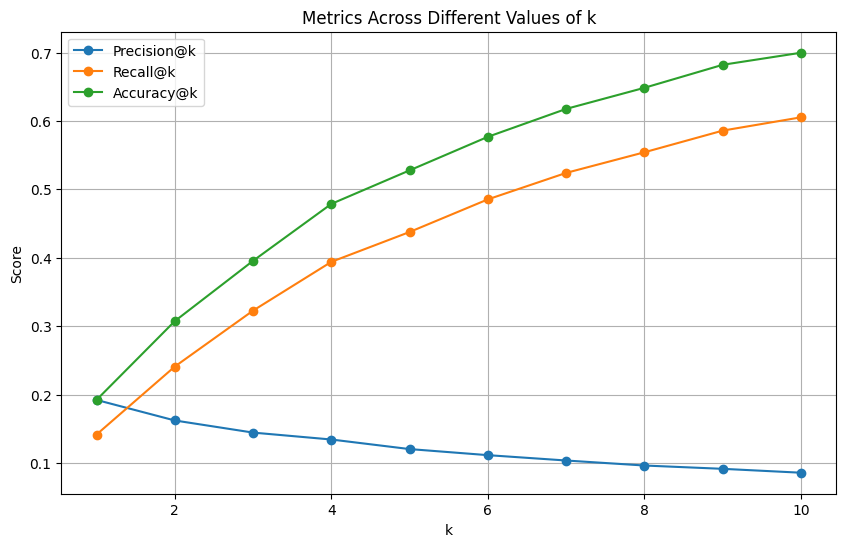

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt

# Load the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a function to retrieve the most relevant paragraphs from a new paper
def retrieve_from_paper(question, paper_text, tfidf_vectorizer, k):
    # Split the paper into paragraphs
    paragraphs = [p for p in paper_text if p.strip()]  # Filter out empty paragraphs

    # Transform each paragraph using the fitted TF-IDF vectorizer
    paragraph_tfidf = tfidf_vectorizer.transform(paragraphs)

    # Transform the question
    question_vec = tfidf_vectorizer.transform([question])

    # Calculate cosine similarity between question and each paragraph
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()

    # Rank paragraphs by similarity
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices[:k]]

    return ranked_paragraphs

# Evaluation metrics calculation for a range of k
def calculate_metrics_for_k_range(test_data, tfidf_vectorizer, k_values):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0

        for index, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']
            relevant_paragraphs = row['relevant_paragraphs']  # Expected relevant paragraphs (list of strings)

            # Retrieve the top-k most relevant paragraphs
            ranked_paragraphs = retrieve_from_paper(question, full_paper, tfidf_vectorizer, k)
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]  # Get only the text of the paragraphs

            # Calculate Precision@k
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k

            # Calculate Recall@k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0

            # Calculate Accuracy@k (1 if at least one relevant paragraph is in top-k, else 0)
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1

        # Average the metrics over all questions
        precision_at_k /= total_questions
        recall_at_k /= total_questions
        accuracy_at_k /= total_questions

        # Append scores for the current k
        precision_scores.append(precision_at_k)
        recall_scores.append(recall_at_k)
        accuracy_scores.append(accuracy_at_k)

    # Plotting the metrics across different values of k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, precision_scores, label='Precision@k', marker='o')
    plt.plot(k_values, recall_scores, label='Recall@k', marker='o')
    plt.plot(k_values, accuracy_scores, label='Accuracy@k', marker='o')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title('Metrics Across Different Values of k')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming `test_data` is your test DataFrame with columns 'question', 'full_paper', and 'relevant_paragraphs'
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Define the range of k values you want to test
calculate_metrics_for_k_range(test_data, tfidf_vectorizer, k_values)

# BM25

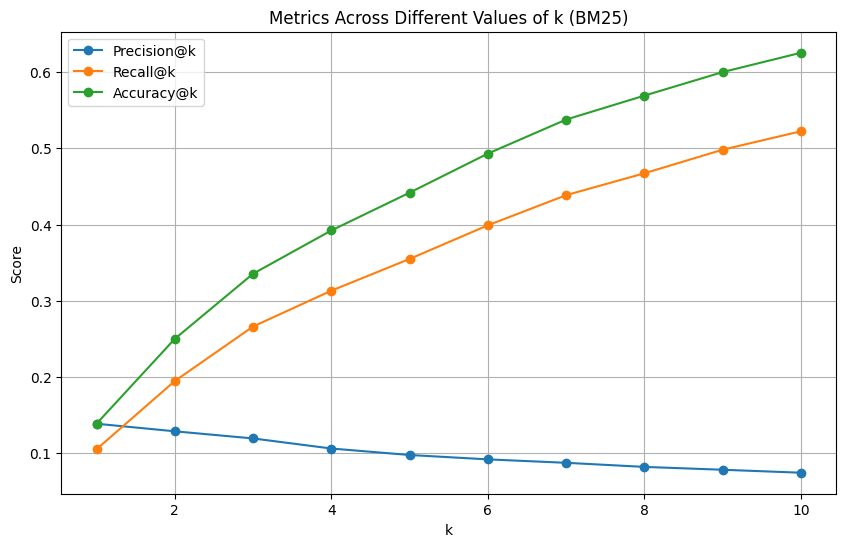

In [ ]:
import pandas as pd
from rank_bm25 import BM25Okapi
import matplotlib.pyplot as plt

# Define a function to retrieve the most relevant paragraphs within each paper independently using BM25
def retrieve_from_paper_bm25(question, paper_paragraphs, k=5):
    # Tokenize each paragraph in the paper
    tokenized_paragraphs = [paragraph.split() for paragraph in paper_paragraphs]

    # Initialize BM25 for this specific paper
    bm25 = BM25Okapi(tokenized_paragraphs)

    # Tokenize the question
    tokenized_question = question.split()

    # Get BM25 scores for each paragraph
    scores = bm25.get_scores(tokenized_question)

    # Rank paragraphs by score
    ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:k]
    ranked_paragraphs = [(paper_paragraphs[i], scores[i]) for i in ranked_indices]

    return ranked_paragraphs

# Evaluation metrics calculation for a range of k
def calculate_metrics_for_k_range_bm25(test_data, k_values):
    precision_scores = []
    recall_scores = []
    accuracy_scores = []

    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0

        for index, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']  # A list of paragraphs for this test paper
            relevant_paragraphs = row['relevant_paragraphs']  # Expected relevant paragraphs (list of strings)

            # Retrieve the top-k most relevant paragraphs for the question within this paper
            try:
                ranked_paragraphs = retrieve_from_paper_bm25(question, full_paper, k=k)
            except ValueError as e:
                print(f"Error in row {index}: {e}")
                continue  # Skip this entry if there is a mismatch

            # Get only the text of the retrieved paragraphs
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]

            # Calculate Precision@k
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k

            # Calculate Recall@k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0

            # Calculate Accuracy@k (1 if at least one relevant paragraph is in top-k, else 0)
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1

        # Average the metrics over all questions
        precision_at_k /= total_questions
        recall_at_k /= total_questions
        accuracy_at_k /= total_questions

        # Append scores for the current k
        precision_scores.append(precision_at_k)
        recall_scores.append(recall_at_k)
        accuracy_scores.append(accuracy_at_k)

    # Plotting the metrics across different values of k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, precision_scores, label='Precision@k', marker='o')
    plt.plot(k_values, recall_scores, label='Recall@k', marker='o')
    plt.plot(k_values, accuracy_scores, label='Accuracy@k', marker='o')
    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title('Metrics Across Different Values of k (BM25)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming `test_data` is your test DataFrame with columns 'question', 'full_paper', and 'relevant_paragraphs'
# 'full_paper' should be a list of paragraphs for each paper
# 'relevant_paragraphs' should be a list of strings representing the relevant paragraphs
test_data = test_data  # Replace with your actual test dataset
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Define the range of k values you want to test
calculate_metrics_for_k_range_bm25(test_data, k_values)


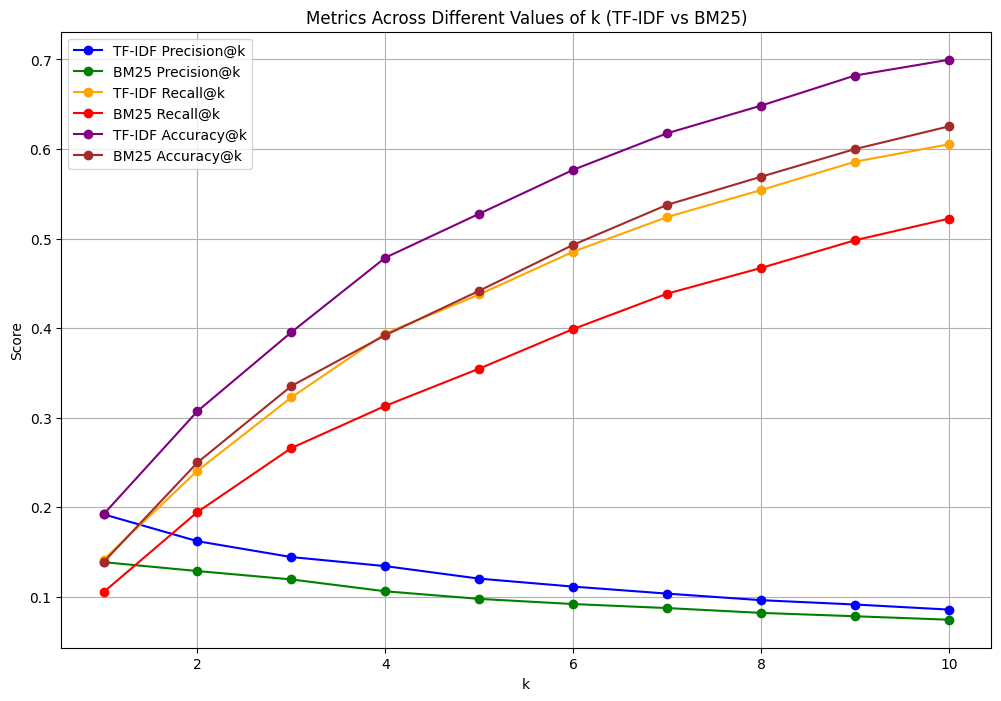

In [ ]:
import pandas as pd
from rank_bm25 import BM25Okapi
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pickle

# Load the trained TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

# Define a function to retrieve relevant paragraphs with TF-IDF
def retrieve_from_paper_tfidf(question, paper_text, tfidf_vectorizer, k):
    paragraphs = [p for p in paper_text if p.strip()]  # Filter out empty paragraphs
    paragraph_tfidf = tfidf_vectorizer.transform(paragraphs)
    question_vec = tfidf_vectorizer.transform([question])
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices[:k]]
    return ranked_paragraphs

# Define a function to retrieve relevant paragraphs with BM25
def retrieve_from_paper_bm25(question, paper_paragraphs, k=5):
    tokenized_paragraphs = [paragraph.split() for paragraph in paper_paragraphs]
    bm25 = BM25Okapi(tokenized_paragraphs)
    tokenized_question = question.split()
    scores = bm25.get_scores(tokenized_question)
    ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:k]
    ranked_paragraphs = [(paper_paragraphs[i], scores[i]) for i in ranked_indices]
    return ranked_paragraphs

# Calculate metrics for TF-IDF
def calculate_metrics_for_k_range_tfidf(test_data, tfidf_vectorizer, k_values):
    precision_scores, recall_scores, accuracy_scores = [], [], []
    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0
        for _, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']
            relevant_paragraphs = row['relevant_paragraphs']
            ranked_paragraphs = retrieve_from_paper_tfidf(question, full_paper, tfidf_vectorizer, k)
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1
        precision_scores.append(precision_at_k / total_questions)
        recall_scores.append(recall_at_k / total_questions)
        accuracy_scores.append(accuracy_at_k / total_questions)
    return precision_scores, recall_scores, accuracy_scores

# Calculate metrics for BM25
def calculate_metrics_for_k_range_bm25(test_data, k_values):
    precision_scores, recall_scores, accuracy_scores = [], [], []
    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0
        for _, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']
            relevant_paragraphs = row['relevant_paragraphs']
            try:
                ranked_paragraphs = retrieve_from_paper_bm25(question, full_paper, k=k)
            except ValueError as e:
                print(f"Error in row {_}: {e}")
                continue
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1
        precision_scores.append(precision_at_k / total_questions)
        recall_scores.append(recall_at_k / total_questions)
        accuracy_scores.append(accuracy_at_k / total_questions)
    return precision_scores, recall_scores, accuracy_scores

# Combined plotting function for TF-IDF and BM25
def plot_combined_metrics(test_data, tfidf_vectorizer, k_values):
    # Calculate metrics for TF-IDF
    tfidf_precision, tfidf_recall, tfidf_accuracy = calculate_metrics_for_k_range_tfidf(test_data, tfidf_vectorizer, k_values)

    # Calculate metrics for BM25
    bm25_precision, bm25_recall, bm25_accuracy = calculate_metrics_for_k_range_bm25(test_data, k_values)

    # Plotting the metrics
    plt.figure(figsize=(12, 8))

    # Precision@k Plot
    plt.plot(k_values, tfidf_precision, label='TF-IDF Precision@k', marker='o', color='blue')
    plt.plot(k_values, bm25_precision, label='BM25 Precision@k', marker='o', color='green')

    # Recall@k Plot
    plt.plot(k_values, tfidf_recall, label='TF-IDF Recall@k', marker='o', color='orange')
    plt.plot(k_values, bm25_recall, label='BM25 Recall@k', marker='o', color='red')

    # Accuracy@k Plot
    plt.plot(k_values, tfidf_accuracy, label='TF-IDF Accuracy@k', marker='o', color='purple')
    plt.plot(k_values, bm25_accuracy, label='BM25 Accuracy@k', marker='o', color='brown')

    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title('Metrics Across Different Values of k (TF-IDF vs BM25)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming `test_data` is your test DataFrame with columns 'question', 'full_paper', and 'relevant_paragraphs'
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Define the range of k values you want to test
plot_combined_metrics(test_data, tfidf_vectorizer, k_values)


# Fairer Comparison

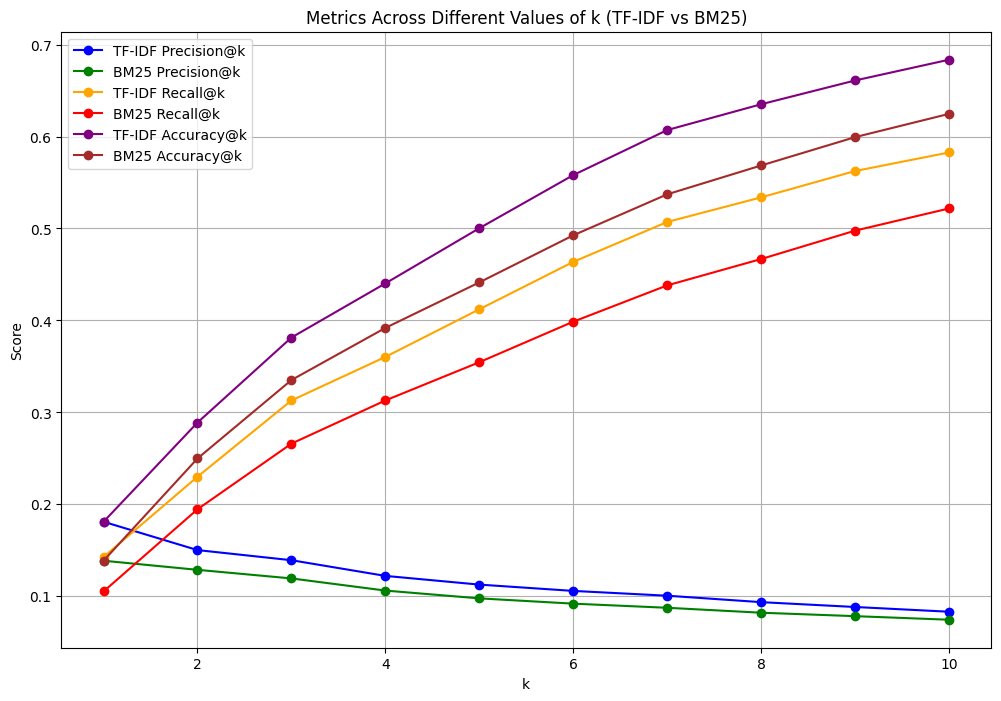

In [ ]:
import pandas as pd
from rank_bm25 import BM25Okapi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Define a function to initialize TF-IDF for each paper and retrieve relevant paragraphs
def retrieve_from_paper_tfidf_independent(question, paper_text, k):
    # Initialize TF-IDF vectorizer for this paper independently
    tfidf_vectorizer = TfidfVectorizer()
    paragraphs = [p for p in paper_text if p.strip()]  # Filter out empty paragraphs
    paragraph_tfidf = tfidf_vectorizer.fit_transform(paragraphs)

    # Transform the question using the same vectorizer
    question_vec = tfidf_vectorizer.transform([question])
    similarities = cosine_similarity(question_vec, paragraph_tfidf).flatten()

    # Rank paragraphs by similarity
    ranked_indices = similarities.argsort()[::-1]
    ranked_paragraphs = [(paragraphs[i], similarities[i]) for i in ranked_indices[:k]]
    return ranked_paragraphs

# Define a function to retrieve relevant paragraphs with BM25
def retrieve_from_paper_bm25(question, paper_paragraphs, k=5):
    tokenized_paragraphs = [paragraph.split() for paragraph in paper_paragraphs]
    bm25 = BM25Okapi(tokenized_paragraphs)
    tokenized_question = question.split()
    scores = bm25.get_scores(tokenized_question)
    ranked_indices = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:k]
    ranked_paragraphs = [(paper_paragraphs[i], scores[i]) for i in ranked_indices]
    return ranked_paragraphs

# Calculate metrics for independent TF-IDF on each paper
def calculate_metrics_for_k_range_tfidf_independent(test_data, k_values):
    precision_scores, recall_scores, accuracy_scores = [], [], []
    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0
        for _, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']
            relevant_paragraphs = row['relevant_paragraphs']
            ranked_paragraphs = retrieve_from_paper_tfidf_independent(question, full_paper, k)
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1
        precision_scores.append(precision_at_k / total_questions)
        recall_scores.append(recall_at_k / total_questions)
        accuracy_scores.append(accuracy_at_k / total_questions)
    return precision_scores, recall_scores, accuracy_scores

# Calculate metrics for BM25
def calculate_metrics_for_k_range_bm25(test_data, k_values):
    precision_scores, recall_scores, accuracy_scores = [], [], []
    for k in k_values:
        total_questions = len(test_data)
        precision_at_k = 0
        recall_at_k = 0
        accuracy_at_k = 0
        for _, row in test_data.iterrows():
            question = row['question']
            full_paper = row['full_paper']
            relevant_paragraphs = row['relevant_paragraphs']
            try:
                ranked_paragraphs = retrieve_from_paper_bm25(question, full_paper, k=k)
            except ValueError as e:
                print(f"Error in row {_}: {e}")
                continue
            retrieved_paragraphs = [para[0] for para in ranked_paragraphs]
            relevant_retrieved = [para for para in retrieved_paragraphs if para in relevant_paragraphs]
            precision_at_k += len(relevant_retrieved) / k
            recall_at_k += len(relevant_retrieved) / len(relevant_paragraphs) if len(relevant_paragraphs) > 0 else 0
            if any(para in relevant_paragraphs for para in retrieved_paragraphs):
                accuracy_at_k += 1
        precision_scores.append(precision_at_k / total_questions)
        recall_scores.append(recall_at_k / total_questions)
        accuracy_scores.append(accuracy_at_k / total_questions)
    return precision_scores, recall_scores, accuracy_scores

# Combined plotting function for independent TF-IDF and BM25
def plot_combined_metrics(test_data, k_values):
    # Calculate metrics for independent TF-IDF
    tfidf_precision, tfidf_recall, tfidf_accuracy = calculate_metrics_for_k_range_tfidf_independent(test_data, k_values)

    # Calculate metrics for BM25
    bm25_precision, bm25_recall, bm25_accuracy = calculate_metrics_for_k_range_bm25(test_data, k_values)

    # Plotting the metrics
    plt.figure(figsize=(12, 8))

    # Precision@k Plot
    plt.plot(k_values, tfidf_precision, label='TF-IDF Precision@k', marker='o', color='blue')
    plt.plot(k_values, bm25_precision, label='BM25 Precision@k', marker='o', color='green')

    # Recall@k Plot
    plt.plot(k_values, tfidf_recall, label='TF-IDF Recall@k', marker='o', color='orange')
    plt.plot(k_values, bm25_recall, label='BM25 Recall@k', marker='o', color='red')

    # Accuracy@k Plot
    plt.plot(k_values, tfidf_accuracy, label='TF-IDF Accuracy@k', marker='o', color='purple')
    plt.plot(k_values, bm25_accuracy, label='BM25 Accuracy@k', marker='o', color='brown')

    plt.xlabel('k')
    plt.ylabel('Score')
    plt.title('Metrics Across Different Values of k (TF-IDF vs BM25)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
# Assuming `test_data` is your test DataFrame with columns 'question', 'full_paper', and 'relevant_paragraphs'
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Define the range of k values you want to test
plot_combined_metrics(test_data, k_values)


# Dense Passage Retrieval